## Feature Scaling

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

We discussed previously that the scale of the features is an important consideration when building machine learning models. Briefly:


### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


### Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques, which we will discuss throughout this section:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

In this notebook, we will discuss **Mean Normalisation**.

=================================================================

## Mean Normalisation


Mean normalisation involves centering the variable at zero, and re-scaling to the value range. The procedure involves subtracting the mean of each observation and then dividing by difference between the minimum and maximum value:

**x_scaled = (x - x_mean) / ( x_max - x_min)**


The result of the above transformation is a distribution that is centered at 0, and its minimum and maximum values are within the range of -1 to 1. The shape of a mean normalised distribution will be similar to the original distribution.

In a nutshell, mean normalisation:

- centers the mean at 0
- variance will be different
- the minimum and maximum values are squeezed between -1 and 1
- preserves outliers

Good for algorithms that require features centered at zero.


## In this demo

There is no Scikit-learn transformer for mean normalisation, but we can implement it using a combination of 2 other transformers that I will discuss in detail in the next notebooks. We will also implement it manually with pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# dataset for the demo
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# the scaler - for mean normalisation
from sklearn.preprocessing import StandardScaler, RobustScaler

In [2]:
# load the California House price data from Scikit-learn

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [3]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes

X.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31


The different variables present different value ranges, mean, max, min, standard deviations, etc. In other words, they show different magnitudes or scales. 

Note that **the mean values are not centered at zero, and the min and max value vary across a big range**.

When performing mean normalisation on the data set, we need to first identify the mean and minimum and maximum values of the variables. These parameters need to be learned from the train set, stored, and then used to scale test and future data. Thus, we will first divide the data set into train and test, as we have done throughout the course.

In [4]:
# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

# size
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

## Pandas

In [5]:
# let's first learn the mean from the train set

means = X_train.mean(axis=0)
means

MedInc           3.866667
HouseAge        28.618702
AveRooms         5.423404
AveBedrms        1.094775
Population    1425.157323
AveOccup         3.040518
Latitude        35.630093
Longitude     -119.566647
dtype: float64

In [6]:
# let's now learn the min and max values, and the value range 
# from the train set

ranges = X_train.max(axis=0)-X_train.min(axis=0)
ranges

MedInc           14.500200
HouseAge         51.000000
AveRooms        131.687179
AveBedrms        33.733333
Population    35679.000000
AveOccup        598.964286
Latitude          9.410000
Longitude        10.040000
dtype: float64

In [7]:
# now we are ready to perform mean normalisation:

X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

In [8]:
# let's check the stats of the scaled data:

X_train_scaled.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,0.13,0.25,0.02,0.01,0.03,0.01,0.23,0.20
min,-0.23,-0.54,-0.03,-0.02,-0.04,-0.00,-0.33,-0.48
25%,-0.09,-0.21,-0.01,-0.00,-0.02,-0.00,-0.18,-0.22
50%,-0.02,0.01,-0.00,-0.00,-0.01,-0.00,-0.15,0.11
75%,0.06,0.16,0.00,0.00,0.01,0.00,0.22,0.16
max,0.77,0.46,0.97,0.98,0.96,1.00,0.67,0.52


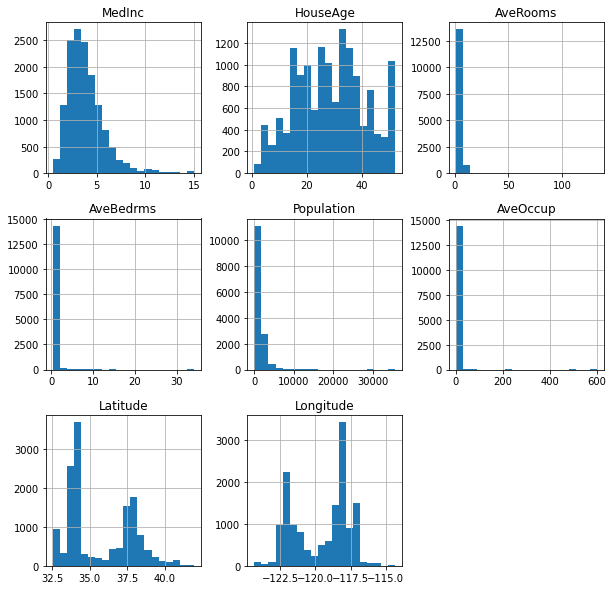

In [9]:
# Distribution before scaling:

X_train.hist(bins=20, figsize=(10,10))
plt.show()

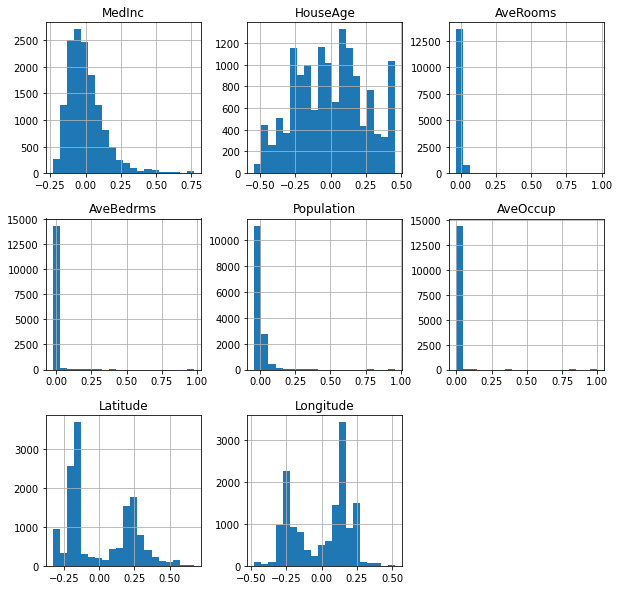

In [10]:
# Distribution after scaling:

X_train_scaled.hist(bins=20, figsize=(10,10))
plt.show()

As expected, the mean of each variable, which were not centered at zero, is now around zero and the min and max values vary approximately between -1 and 1.

## Scikit-learn: work-around

We can implement mean normalisation by combining the use of 2 transformers.

In [11]:
# set up the StandardScaler to remove the mean
# without dividing by the standard deviation:

scaler_mean = StandardScaler(
    with_mean=True, 
    with_std=False,
).set_output(transform="pandas")

In [12]:
# set up the robustscaler so that it does NOT remove the median
# but divides the sample by max()-min().

# To do this, set up the quantile range to 0 and 100
scaler_minmax = RobustScaler(
    with_centering=False,
    with_scaling=True,
    quantile_range=(0, 100),
).set_output(transform="pandas")

In [13]:
# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

RobustScaler(quantile_range=(0, 100), with_centering=False)

In [14]:
# transform train and test sets

X_train_scaled = scaler_minmax.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_minmax.transform(scaler_mean.transform(X_test))

In [15]:
# let's check the stats of the scaled data:

X_train_scaled.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,0.13,0.25,0.02,0.01,0.03,0.01,0.23,0.20
min,-0.23,-0.54,-0.03,-0.02,-0.04,-0.00,-0.33,-0.48
25%,-0.09,-0.21,-0.01,-0.00,-0.02,-0.00,-0.18,-0.22
50%,-0.02,0.01,-0.00,-0.00,-0.01,-0.00,-0.15,0.11
75%,0.06,0.16,0.00,0.00,0.01,0.00,0.22,0.16
max,0.77,0.46,0.97,0.98,0.96,1.00,0.67,0.52


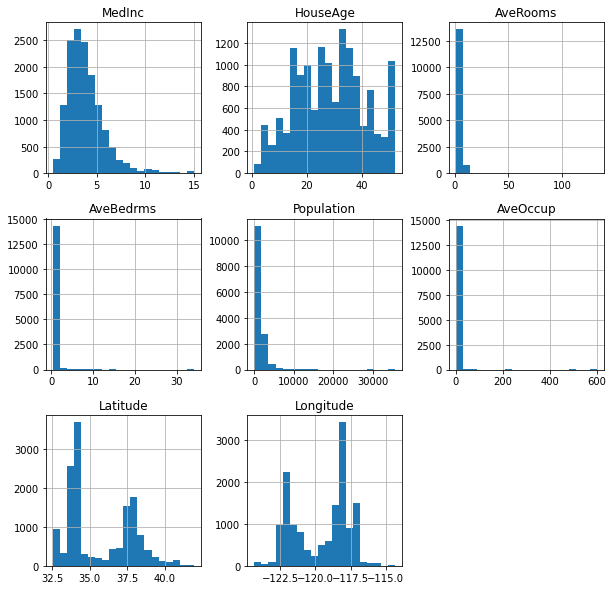

In [16]:
# Distribution before scaling:

X_train.hist(bins=20, figsize=(10,10))
plt.show()

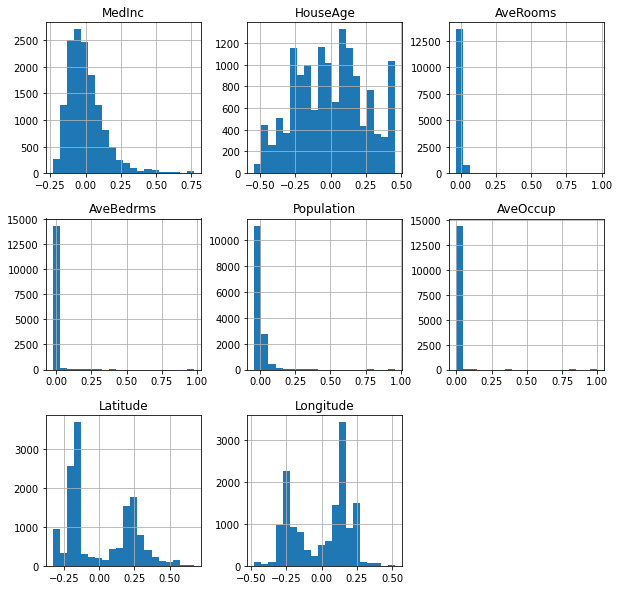

In [17]:
# Distribution after scaling:

X_train_scaled.hist(bins=20, figsize=(10,10))
plt.show()

Same result as with pandas.